In [2]:
from __future__ import division, print_function

import os, glob
import numpy as np
import matplotlib.pyplot as plt

from rvseg import patient

from keras import utils

%matplotlib inline

Using TensorFlow backend.


In [3]:
basedir = "E:\workspace\dataset\RVSC\TrainingSet"
datadir = os.path.join(basedir, "patient09")
p = patient.PatientData(datadir)

#### 模型加载

In [4]:
images = p.images

In [5]:
images = np.asarray(images)[:,:,:,None]

In [6]:
_, height, width, channels = images.shape

In [7]:
channels

1

In [8]:
image = images[0]

In [10]:
image[None,:,:,:].shape

(1, 216, 256, 1)

In [8]:
from rvseg import opts, dataset, models

In [9]:
model = models.dilated_unet

In [10]:
m = model(height=height, width=width, channels=channels, classes=2,
              features=32, depth=3, padding='same',
              temperature=1.0, batchnorm=True,
              dropout=0.0)

In [11]:
m.load_weights(r'weights-final.hdf5')

In [11]:
masks_pred = np.concatenate([m.predict(image[None,:,:,:]) for image in images])

In [13]:
mask_pred = m.predict(image[None,:,:,:])

In [14]:
pre = mask_pred[0,:,:,1]

In [15]:
pre.mean()

3.878302e-07

In [40]:
pre = np.round(pre)

In [19]:
masks[0].mean()

0.1322699652777778

In [16]:
inner_masks = p.endocardium_masks

In [17]:
masks = np.asarray(inner_masks)

In [16]:
dims = masks.shape
classes = len(set(masks[0].flatten())) # get num classes from first image
new_shape = dims + (classes,)
masks = utils.to_categorical(masks).reshape(new_shape)

In [18]:
mask = masks[0]

In [ ]:
y_pred = np.round(pre[:,:,1]).astype('uint8')

In [20]:
def save_image(image, mask_true, mask_pred, alpha=0.3):
    cmap = plt.cm.gray
    plt.figure(figsize=(12, 3.75))
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(image, cmap=cmap)
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(image, cmap=cmap)
    plt.imshow(mask_pred, cmap=cmap, alpha=alpha)
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(image, cmap=cmap)
    plt.imshow(mask_true, cmap=cmap, alpha=alpha)
    plt.show()

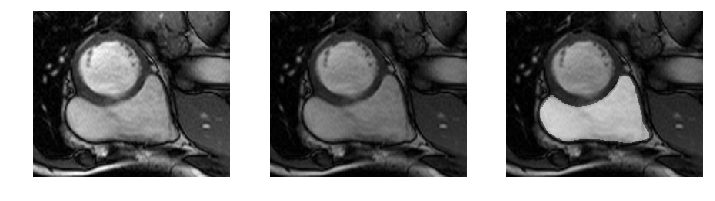

In [21]:
save_image(image[:,:,0],mask,pre)

In [30]:
y_pred.std()

0.0

In [ ]:
from keras.models import load_model